# Why are you interested in this dataset?

Battery remaining useful life (RUL) represents the remaining life until the end of life in a car battery. It is used to determine the battery health. I am interested in this particular dataset because I enjoy working on cars and am curious to know what contributes to the EOL (end of life) of the engine. After doing some research, I determined that the factors I should be examining are Cycle Index, Discharge Time (s), Charging Time (s), and RUL because battery life is mainly determined by cycles. And, cycles are defined as the time between charge and discharge according to [CED Greentech](https://www.cedgreentech.com/article/battery-life-and-performance-factors).

---

This dataset came from [this kaggle link](https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul). "Battery Remaining Useful Life (RUL). The Hawaii Natural Energy Institute examined 14 NMC-LCO 18650 batteries with a nominal capacity of 2.8 Ah, which were cycled over 1000 times at 25°C with a CC-CV charge rate of C/2 rate and discharge rate of 1.5C.

From that source dataset, I created features that showcase the voltage and current behaviour over each cycle. Those features can be used to predict the remaining useful life (RUL) of the batteries."

# What are 10 (or more) questions that you hope to answer through your data analysis?

No. | Question
:-:|:-

1 | What is the maximum battery cycle?
2 | What is the average discharge time?
3 | What is the average charge time?
4 | Which variable has a positive correlation to remaining useful life?
5 | What type of correlation does charging time and discharge time have?
6 | At what cycle does the RUL decrease?
7 | Of the four factors, which has the greatest spread?
8 | What is the average max voltage discharge?
9 | What is the average minimun voltage charge?
10 | Is the relationship between discharge and charging time similar to the relationship between discharge time and the time constant current?

In [2]:
import pandas as pd
import seaborn as sns

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#raw data
battery_life_data = pd.read_csv("Battery_RUL.csv")
battery_life_data

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [3]:
#Trimmed data
updated_data = battery_life_data[['Cycle_Index', 'Discharge Time (s)', 'Charging time (s)', 'RUL']]
updated_data.head()

,Cycle_Index,Discharge Time (s),Charging time (s),RUL
0,1.0,2595.30,10777.82,1112
1,2.0,7408.64,10500.35,1111
2,3.0,7393.76,10420.38,1110
3,4.0,7385.50,10322.81,1109
4,6.0,65022.75,56699.65,1107


In [3]:
# Answering question 1: What is the maximum battery cycle?

In [4]:
max_battery_cycle = battery_life_data['Cycle_Index'].max()
print('The average maximum battery cycle is: ', max_battery_cycle.round(3))

The average maximum battery cycle is:  1134.0


In [5]:
# Answering question 2: What is the average discharge time? 

In [6]:
avg_discharge_time = battery_life_data['Discharge Time (s)'].mean()
print('The average discharge time is: ', avg_discharge_time.round(3))

The average discharge time is:  4581.274


In [7]:
# Answering question 3: What is the average charge time?

In [8]:
avg_charge_time = battery_life_data['Charging time (s)'].mean()
print('The average charge time is: ', avg_charge_time.round(3))

The average charge time is:  10066.496


Out of the 4 variables, no variable has a positive correlation to remaining useful life. However, it appears that there is a negative linear correlation between RUL and Cycle Index.


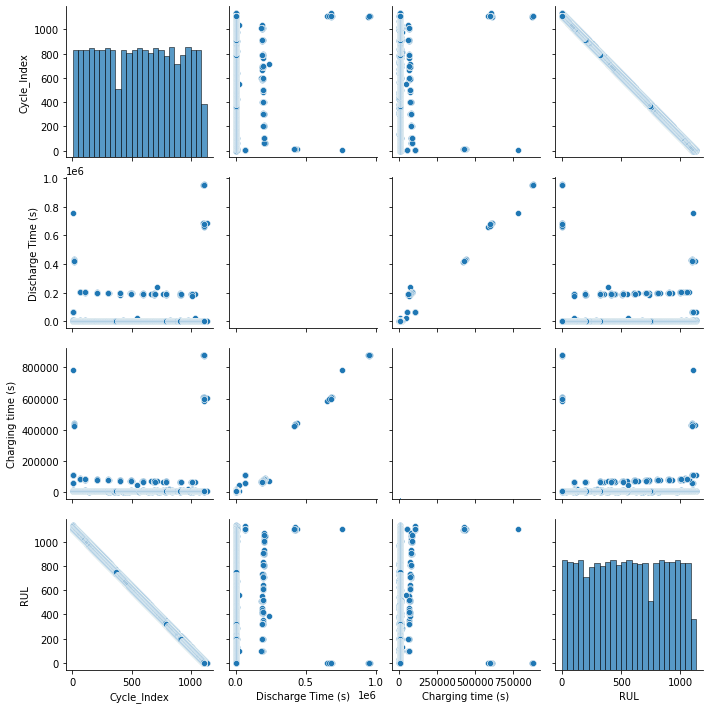

In [9]:
# Answering question 4: Which variable has a positive correlation to remaining useful life?

#Cycle Index and RUL
sns.pairplot(updated_data)

print("Out of the 4 variables, no variable has a positive correlation to remaining useful life. However, it appears that there is a negative linear correlation between RUL and Cycle Index.")


In [10]:
# Answering question 5: What type of correlation does charging time and discharge time have?

No matter how the two are plotted, discharge and charging time have a positve linear correlation but not a strong relationship.


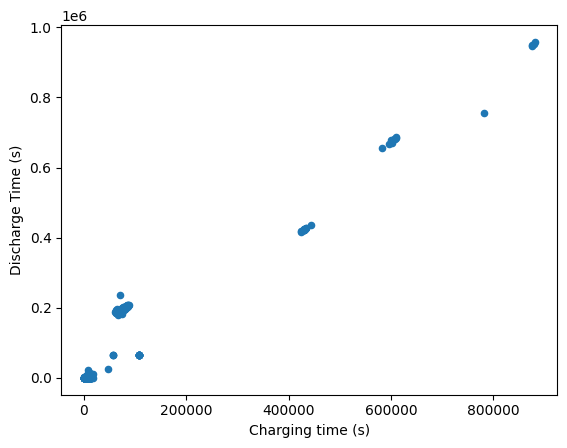

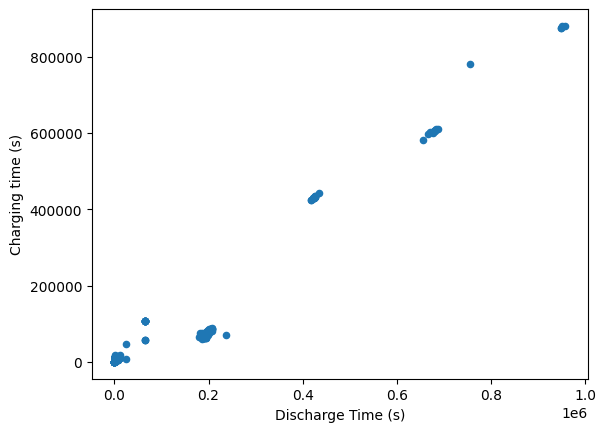

In [11]:
updated_data.plot.scatter(x = 'Charging time (s)', y = 'Discharge Time (s)')
updated_data.plot.scatter(x = 'Discharge Time (s)', y = 'Charging time (s)')

print("No matter how the two are plotted, discharge and charging time have a positve linear correlation but not a strong relationship.")

In [12]:
# Answering question 6: At what cycle does the RUL decrease?

Based on the scatter plot, the RUL decreases instantaneously at Cycle Index 0. This makes sense because there is no way to reverse the wear that cars experience the moment they turn on. It is just like how most passenger vehicles depreciate in value the moment the owner purchases them and takes them off the lot.


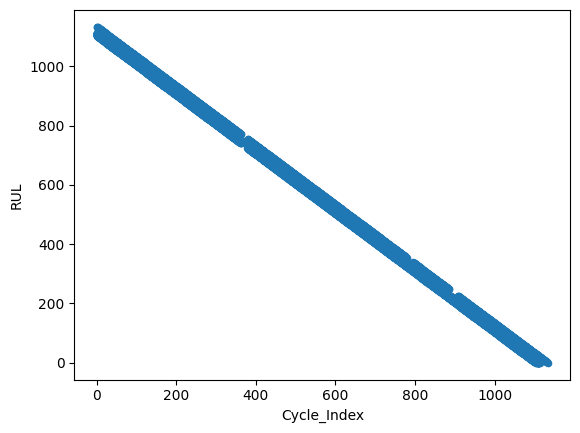

In [13]:
battery_life_data.plot.scatter(x = 'Cycle_Index', y = 'RUL')

print("Based on the scatter plot, the RUL decreases instantaneously at Cycle Index 0. This makes sense because there is no way to reverse the wear that cars experience the moment they turn on. It is just like how most passenger vehicles depreciate in value the moment the owner purchases them and takes them off the lot.")

In [14]:
# Answering question 7: Of the four factors, which has the greatest spread?

In [15]:
Cycle_std = updated_data['Cycle_Index'].std()
print('The standard deviation of the cycle index is: ', Cycle_std.round(3))

Disch_std = updated_data['Discharge Time (s)'].std()
print('The standard deviation of the discharge time is: ', Disch_std.round(3))

Charging_std = updated_data['Charging time (s)'].std()
print('The standard deviation of the charging time is: ', Charging_std.round(3))

RUL_std = updated_data['RUL'].std()
print('The standard deviation of the RUL is: ', RUL_std.round(3))

print("Discharge time appears to have the greatest spread out of the four factors.")

The standard deviation of the cycle index is:  322.378
The standard deviation of the discharge time is:  33144.012
The standard deviation of the charging time is:  26415.354
The standard deviation of the RUL is:  322.435
Discharge time appears to have the greatest spread out of the four factors.


In [16]:
# Answering question 8: What is the average max voltage discharge?

In [17]:
avg_max_volt_discharge = battery_life_data['Max. Voltage Dischar. (V)'].mean()
print('The average max voltage discharge is: ', avg_max_volt_discharge.round(3))

The average max voltage discharge is:  3.908


In [18]:
# Answering question 9: What is the average minimun voltage charge?

In [19]:
avg_min_volt_charge = battery_life_data['Min. Voltage Charg. (V)'].mean()
print('The average minimum voltage charge is: ', avg_min_volt_charge.round(3))

The average minimum voltage charge is:  3.578


In [20]:
# Answering question 10: Is the relationship between discharge and charging time similar to the relationship between discharge time and the time constant current?

The two plots appear to have a linear relationship that is not strongly correlated due to a few outliers between 0 and 200000 seconds.


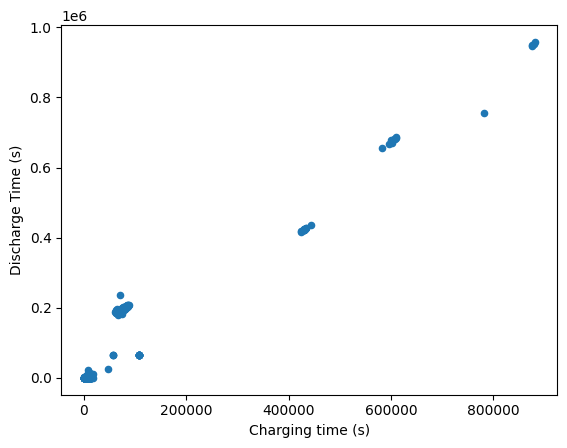

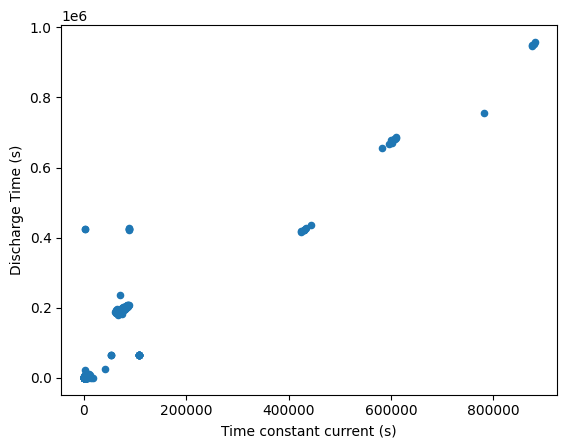

In [21]:
battery_life_data.plot.scatter(x = 'Charging time (s)', y = 'Discharge Time (s)')
battery_life_data.plot.scatter(x = 'Time constant current (s)', y = 'Discharge Time (s)')

print("The two plots appear to have a linear relationship that is not strongly correlated due to a few outliers between 0 and 200000 seconds.")

# Machine Learning Model: Linear Regression

In [19]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [9]:
# Dividing the  data set into X and Y
y_train = updated_data.pop('RUL')
X_train = updated_data

In [23]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Discharge Time (s)', True, 1), ('Charging time (s)', True, 1)]

In [32]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_lm)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    RUL   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.133
Date:                Thu, 01 Sep 2022   Prob (F-statistic):             0.0161
Time:                        09:48:05   Log-Likelihood:            -1.0838e+05
No. Observations:               15064   AIC:                         2.168e+05
Df Residuals:                   15061   BIC:                         2.168e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                549.0330      3

In [33]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Discharge Time (s),8.02
2,Charging time (s),8.02
0,const,1.53


C:\Users\Ekena\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

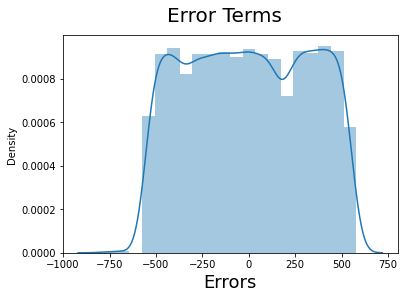

In [34]:
y_train_price = lm.predict(X_train_lm)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [62]:
# Now let's use our model to make predictions.
y_test = y_train
X_test = updated_data

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)
y_pred

0        555.488682
1        553.357891
2        553.308228
3        553.243653
4        562.315099
            ...    
15059    553.370797
15060    553.364608
15061    553.342267
15062    554.052620
15063    693.709225
Length: 15064, dtype: float64

In [53]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred)

0.0005484769399506373